In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(27)

In [2]:
def train(modelName, model, inputData, groundTruth):
    lossArr = []

    epoch = 0
    totalEpochs = 20000
    acceptableLoss = 0.0001
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
    isConverged = epoch >= totalEpochs
    print(f'Training {modelName} for {totalEpochs} epochs until Loss goes below {acceptableLoss}')
    while not isConverged:
        predictedOutput = model(inputData)  
        loss = nn.MSELoss()(predictedOutput, groundTruth)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step() 
        currentLoss = loss.detach().numpy()
        lossArr.append(currentLoss)

        if epoch % 200 == 0:
            print(f'epoch: {epoch} currentLoss: {currentLoss}')
        epoch += 1
        isConverged = epoch >= totalEpochs or lossArr[-1] < acceptableLoss

    print(f'After training, loss: {lossArr[-1]}\n')
    return lossArr

In [3]:
class FirstModel(nn.Module):
    def __init__(self):
        super(FirstModel, self).__init__()
        self.layer_1 = nn.Linear(1, 5)
        self.layer_2 = nn.Linear(5, 15)
        self.layer_3 = nn.Linear(15, 15)
        self.layer_4 = nn.Linear(15, 15)
        self.layer_5 = nn.Linear(15, 15)
        self.layer_6 = nn.Linear(15, 15)
        self.layer_7 = nn.Linear(15, 15)
        self.layer_8 = nn.Linear(15, 5)
        self.layer_9 = nn.Linear(5, 1)

    def forward(self, inputData):
        layerOut1 = nn.functional.relu(self.layer_1(inputData))
        layerOut2 = nn.functional.relu(self.layer_2(layerOut1))
        layerOut3 = nn.functional.relu(self.layer_3(layerOut2))
        layerOut4 = nn.functional.relu(self.layer_4(layerOut3))
        layerOut5 = nn.functional.relu(self.layer_5(layerOut4))
        layerOut6 = nn.functional.relu(self.layer_6(layerOut5))
        layerOut7 = nn.functional.relu(self.layer_7(layerOut6))
        layerOut8 = nn.functional.relu(self.layer_8(layerOut7))
        layerOut9 = self.layer_9(layerOut8)
        return layerOut9

class SecondModel(nn.Module):
    def __init__(self):
        super(SecondModel, self).__init__()
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 20)
        self.layer3 = nn.Linear(20, 15)
        self.layer4 = nn.Linear(15, 1)

    def forward(self, inputData):
        layerOut1 = nn.functional.relu(self.layer1(inputData))
        layerOut2 = nn.functional.relu(self.layer2(layerOut1))
        layerOut3 = nn.functional.relu(self.layer3(layerOut2))
        layerOut4 = self.layer4(layerOut3)
        return layerOut4
    
class ThirdModel(nn.Module):
    def __init__(self):
        super(ThirdModel, self).__init__()
        self.layer1 = nn.Linear(1, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 1)

    def forward(self, inputData):
        layerOut1 = nn.functional.relu(self.layer1(inputData))
        layerOut2 = nn.functional.relu(self.layer2(layerOut1))
        layerOut3 = self.layer3(layerOut2)
        return layerOut3


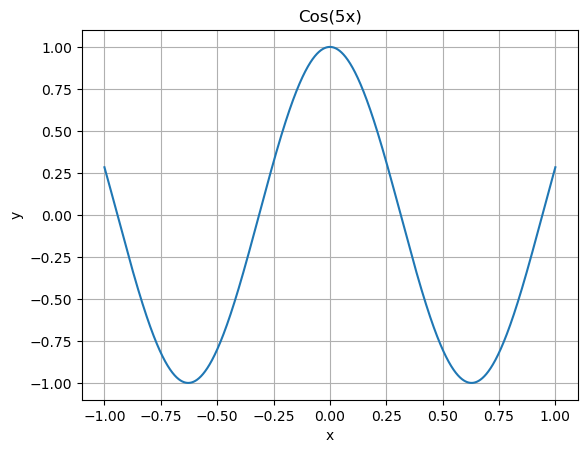

In [4]:
def cosineFunction(x):
  return np.cos(5*x)

x = np.linspace(-1, 1, 2000).reshape(-1, 1)
y = cosineFunction(x)
cosineInput, cosineOutput = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(cosineInput, cosineOutput)
plt.title(r'Cos(5x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [5]:
model1 = FirstModel()
model1Name = 'First Model'
model1Loss = train(model1Name, model1, cosineInput, cosineOutput)
model1TotalParams = sum(p.numel() for p in model1.parameters())
print('Model 1 params - ', model1TotalParams)

model2 = SecondModel()
model2Name = 'Second Model'
model2Loss = train(model2Name, model2, cosineInput, cosineOutput)
model2TotalParams = sum(p.numel() for p in model2.parameters())
print('Model 2 params - ', model2TotalParams)

model3 = ThirdModel()
model3Name = 'Third Model'
model3Loss = train(model3Name, model3, cosineInput, cosineOutput)
model3TotalParams = sum(p.numel() for p in model3.parameters())
print('Model 3 params - ', model3TotalParams)

Training First Model for 20000 epochs until Loss goes below 0.0001
epoch: 0 currentLoss: 0.5212520956993103
epoch: 200 currentLoss: 0.4799599051475525
epoch: 400 currentLoss: 0.45059895515441895
epoch: 600 currentLoss: 0.4367818534374237
epoch: 800 currentLoss: 0.43286818265914917
epoch: 1000 currentLoss: 0.4283279478549957
epoch: 1200 currentLoss: 0.41514936089515686
epoch: 1400 currentLoss: 0.37395626306533813
epoch: 1600 currentLoss: 0.27418723702430725
epoch: 1800 currentLoss: 0.2091720849275589
epoch: 2000 currentLoss: 0.1849866360425949
epoch: 2200 currentLoss: 0.14810693264007568
epoch: 2400 currentLoss: 0.09428241103887558
epoch: 2600 currentLoss: 0.07697563618421555
epoch: 2800 currentLoss: 0.06986711919307709
epoch: 3000 currentLoss: 0.06444791704416275
epoch: 3200 currentLoss: 0.059783242642879486
epoch: 3400 currentLoss: 0.05559925362467766
epoch: 3600 currentLoss: 0.05175509303808212
epoch: 3800 currentLoss: 0.0481826588511467
epoch: 4000 currentLoss: 0.04484289512038231
e

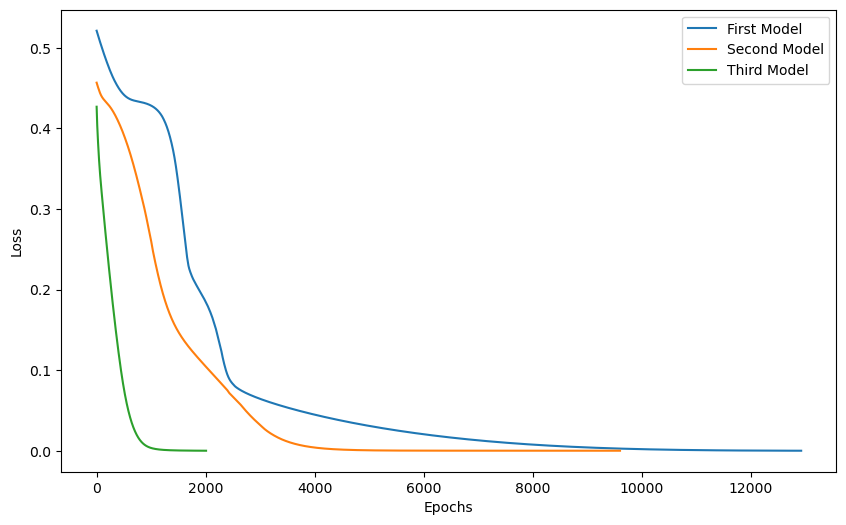

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(model1Loss, label=model1Name)
plt.plot(model2Loss, label=model2Name)
plt.plot(model3Loss, label=model3Name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

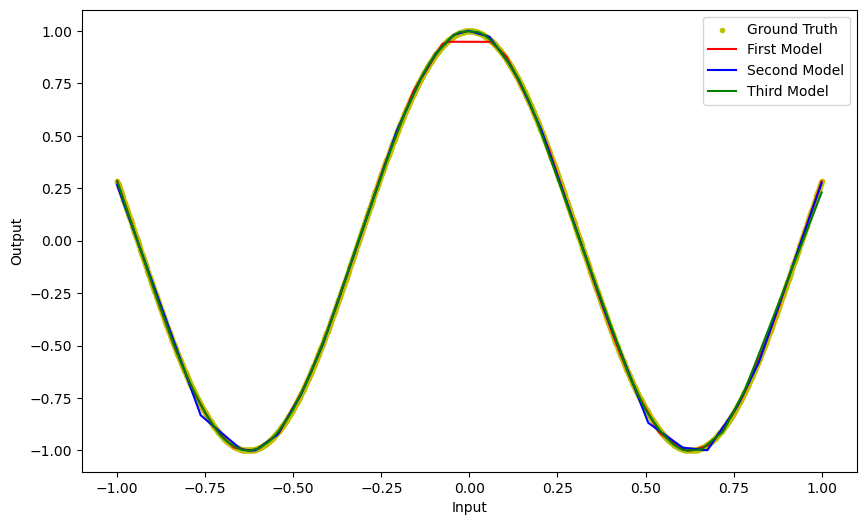

In [7]:
with torch.no_grad():
    model1.eval()
    model2.eval()
    model3.eval()

    model1Predictions = model1(cosineInput)
    model2Predictions = model2(cosineInput)
    model3Predictions = model3(cosineInput)

plt.figure(figsize=(10, 6))
plt.scatter(cosineInput, cosineOutput, label='Ground Truth', marker='.', color="y")
plt.plot(cosineInput, model1Predictions.numpy(), label='First Model', color="r")
plt.plot(cosineInput, model2Predictions.numpy(), label='Second Model', color="b")
plt.plot(cosineInput, model3Predictions.numpy(), label='Third Model', color="g")
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [8]:
def sineFunction(x):
  return np.sin(5*np.pi*x)

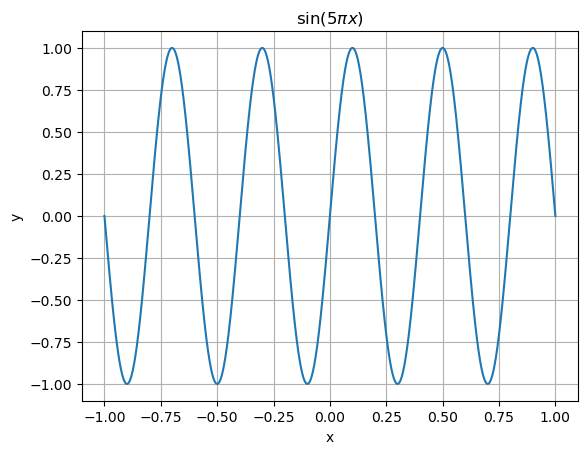

In [12]:
x = np.linspace(-1, 1, 2000).reshape(-1, 1)
y = sineFunction(x)
sineInput, sineOutput = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(sineInput, sineOutput)
plt.title(r'${\sin(5 \pi x)}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Training First Model for 20000 epochs until Loss goes below 0.0001
epoch: 0 currentLoss: 0.6485847234725952
epoch: 200 currentLoss: 0.5905815362930298
epoch: 400 currentLoss: 0.5504919290542603
epoch: 600 currentLoss: 0.4980009198188782
epoch: 800 currentLoss: 0.4953064024448395
epoch: 1000 currentLoss: 0.4932308793067932
epoch: 1200 currentLoss: 0.4909212291240692
epoch: 1400 currentLoss: 0.48915889859199524
epoch: 1600 currentLoss: 0.4882505536079407
epoch: 1800 currentLoss: 0.48765239119529724
epoch: 2000 currentLoss: 0.48704463243484497
epoch: 2200 currentLoss: 0.4863252639770508
epoch: 2400 currentLoss: 0.48538973927497864
epoch: 2600 currentLoss: 0.4841185212135315
epoch: 2800 currentLoss: 0.48239803314208984
epoch: 3000 currentLoss: 0.48012301325798035
epoch: 3200 currentLoss: 0.4770950376987457
epoch: 3400 currentLoss: 0.4711954891681671
epoch: 3600 currentLoss: 0.4619409441947937
epoch: 3800 currentLoss: 0.4452579915523529
epoch: 4000 currentLoss: 0.40705952048301697
epoch: 42

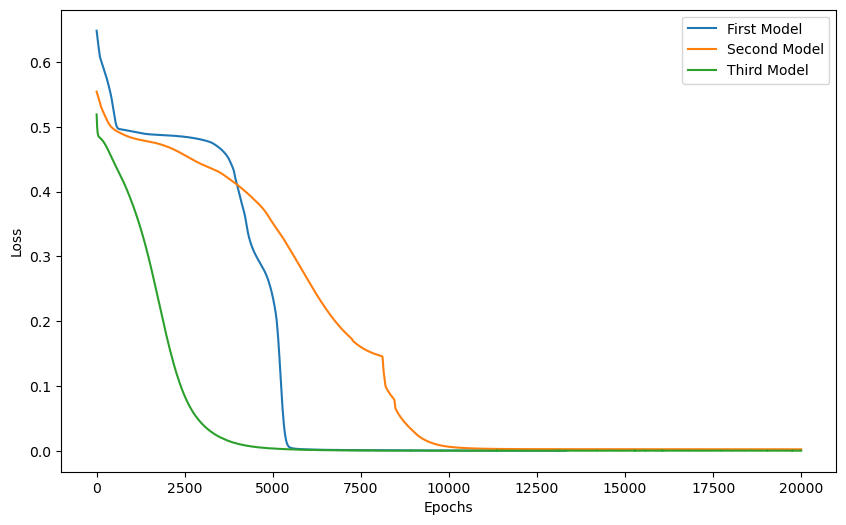

In [10]:
model1 = FirstModel()
model1Name = 'First Model'
model1Loss = train(model1Name, model1, sineInput, sineOutput)
model2 = SecondModel()
model2Name = 'Second Model'
model2Loss = train(model2Name, model2, sineInput, sineOutput)
model3 = ThirdModel()
model3Name = 'Third Model'
model3Loss = train(model3Name, model3, sineInput, sineOutput)

plt.figure(figsize=(10, 6))
plt.plot(model1Loss, label='First Model')
plt.plot(model2Loss, label='Second Model')
plt.plot(model3Loss, label='Third Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

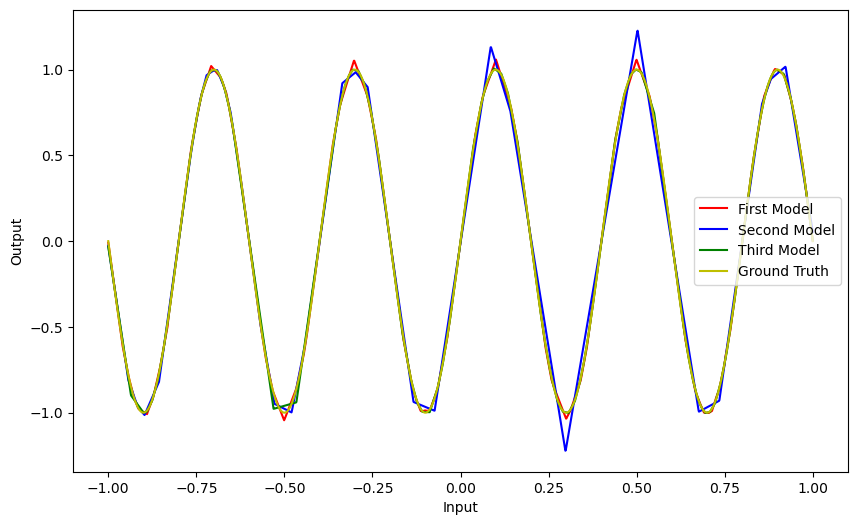

In [11]:
with torch.no_grad():
    model1.eval()
    model2.eval()
    model3.eval()

    model1Predictions = model1(sineInput)
    model2Predictions = model2(sineInput)
    model3Predictions = model3(sineInput)

plt.figure(figsize=(10, 6))
plt.plot(sineInput, model1Predictions.numpy(), label='First Model', color="r")
plt.plot(sineInput, model2Predictions.numpy(), label='Second Model', color="b")
plt.plot(sineInput, model3Predictions.numpy(), label='Third Model', color="g")
plt.plot(sineInput, sineOutput, label='Ground Truth', color="y")
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()